In [129]:
# 1. Загрузите изображение в оттенках серого sar_1_gray.jpg. 
# 2. постройте гистограмму
# 3. реализуйте алгоритм гамма коррекции с параметром гамма <1, >1.
# 4. Сравните исходное изображение, скорректированное при помощи гамма-фильтра. MSE, SSIM.
# 5. реализуйте алгоритм статистической цветокоррекции на основе статистики eq_gray.
# 6. Протестируйте работу алгоритмов пороговой фильтрации с различными параметрами.
# Для каждого решения - напечатайте результат

In [130]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity, mean_squared_error

# 1. Загрузка изображения в оттенках серого

In [131]:
image = cv2.imread('sar_1_gray.jpg')

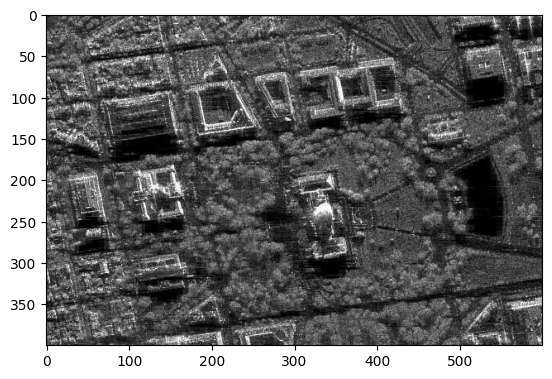

In [132]:
plt.imshow(image)


In [133]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

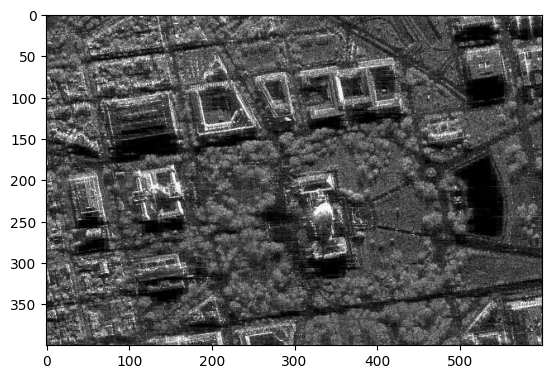

In [134]:
plt.imshow(image_gray, cmap='gray')

# 2. Построение гистограммы

In [135]:
histSize = 256
histRange = (0, 256)
accumulate = False

b_hist = cv2.calcHist([image], [0], None, [histSize], histRange, accumulate=accumulate)

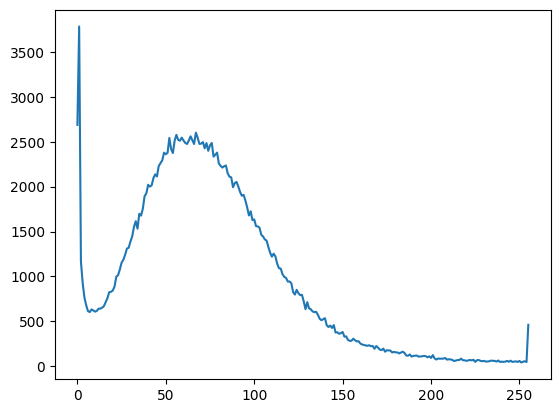

In [136]:
plt.plot(b_hist)

In [137]:
b_hist_cum = b_hist.cumsum()

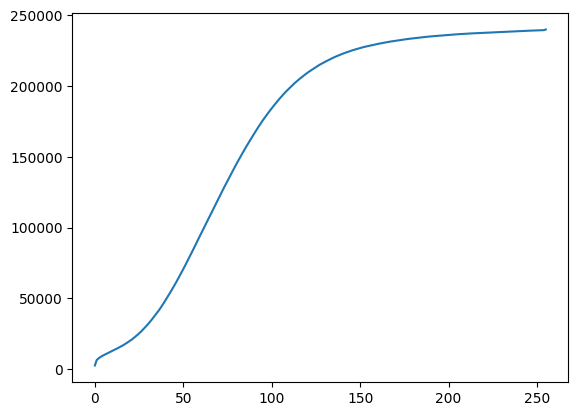

In [138]:
plt.plot(b_hist_cum)

# 3. Реализация алгоритма гамма коррекции с параметром гамма <1, >1

(np.float64(-0.5), np.float64(599.5), np.float64(399.5), np.float64(-0.5))

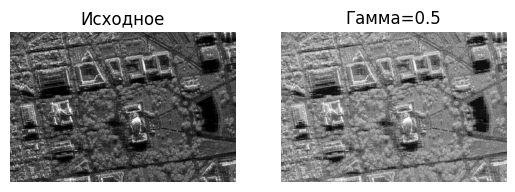

In [139]:
gamma_min = 0.5
out_image_min = 255 * (image/255)**gamma_min
out_image_min = out_image_min.astype(np.uint8)

plt.subplot(1,2,1)
plt.imshow(image)
plt.title("Исходное")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(out_image_min)
plt.title(f"Гамма={gamma_min}")
plt.axis('off')

(np.float64(-0.5), np.float64(599.5), np.float64(399.5), np.float64(-0.5))

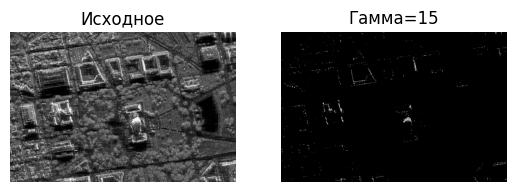

In [140]:
gamma_max = 15
out_image_max = 255 * (image/255)**gamma_max
out_image_max = out_image_max.astype(np.uint8)

plt.subplot(1,2,1)
plt.imshow(image)
plt.title("Исходное")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(out_image_max)
plt.title(f"Гамма={gamma_max}")
plt.axis('off')

# 4. Сравнение исходного изображения, скорректированное при помощи гамма-фильтра. MSE, SSIM.

In [141]:
mse = mean_squared_error(image, out_image_min)
ssim, _ = structural_similarity(image, out_image_min, win_size=3, data_range=255, full=True)

print(f"SSIM: {ssim:}")
print(f"MSE: {mse:}")

SSIM: 0.7735745950691478
MSE: 3250.429145833333


In [142]:
mse = mean_squared_error(image, out_image_max)
ssim, _ = structural_similarity(image, out_image_max, win_size=3, data_range=255, full=True)

print(f"SSIM: {ssim:}")
print(f"MSE: {mse:}")

SSIM: 0.02844390959326608
MSE: 7083.484483333334


# 5. Реализация алгоритма статистической цветокоррекции на основе статистики eq_gray.

Text(0.5, 1.0, 'Исходное \n mean: 74.9, std: 43.7')

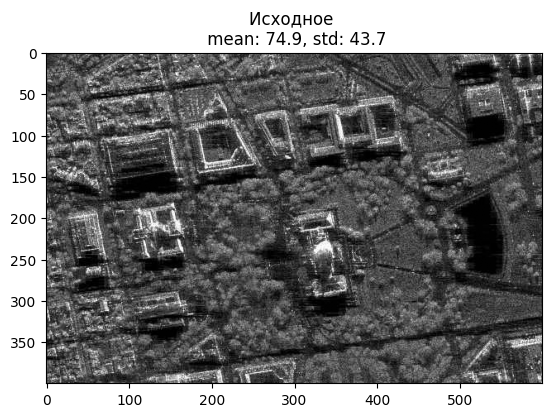

In [143]:
#image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) Было в предыдущем пункте

mean = image_gray.mean()
std = image_gray.std()

plt.imshow(image_gray, cmap='gray')
plt.title(f'Исходное \n mean: {mean:.1f}, std: {std:.1f}')

Text(0.5, 1.0, 'Eq_gray \n mean: 127.0, std: 74.3')

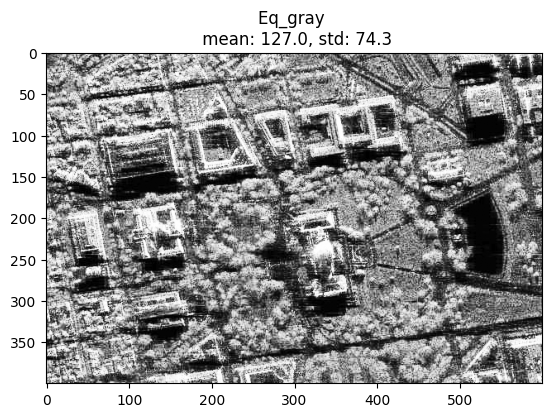

In [144]:
eq_gray_image = cv2.equalizeHist(image_gray)

mean_eq_gray_image = eq_gray_image.mean()
std_eq_gray_image  = eq_gray_image.std()

plt.imshow(eq_gray_image, cmap="gray")
plt.title(f'Eq_gray \n mean: {mean_eq_gray_image:.1f}, std: {std_eq_gray_image:.1f}')

Text(0.5, 1.0, 'Коррекция \n mean: 123.1, std: 65.3')

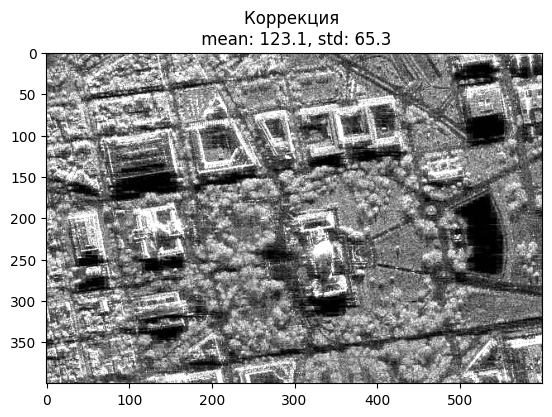

In [145]:
corrected_image = mean_eq_gray_image + (image_gray.astype(np.float32)- mean) * (std_eq_gray_image / std)
corrected_image = np.clip(corrected_image, 0, 255).astype(np.uint8)
mean_cor = corrected_image.mean()
std_cor  = corrected_image.std()

plt.imshow(corrected_image, cmap='gray')
plt.title(f'Коррекция \n mean: {mean_cor:.1f}, std: {std_cor:.1f}')

# 6. Тестирование работы алгоритмов пороговой фильтрации с различными параметрами.

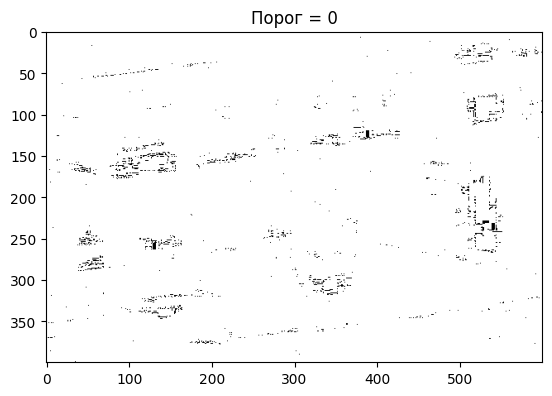

In [146]:
_, thresh1 = cv2.threshold(image_gray, 0, 255, cv2.THRESH_BINARY)
plt.imshow(thresh1, cmap='gray')
plt.title('Порог = 0')
plt.show()

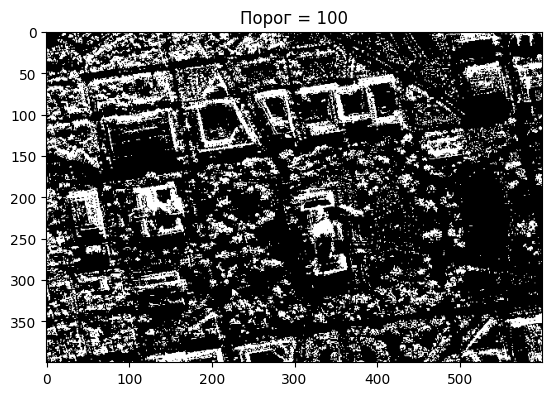

In [147]:
_, thresh1 = cv2.threshold(image_gray, 100, 255, cv2.THRESH_BINARY)
plt.imshow(thresh1, cmap='gray')
plt.title('Порог = 100')
plt.show()

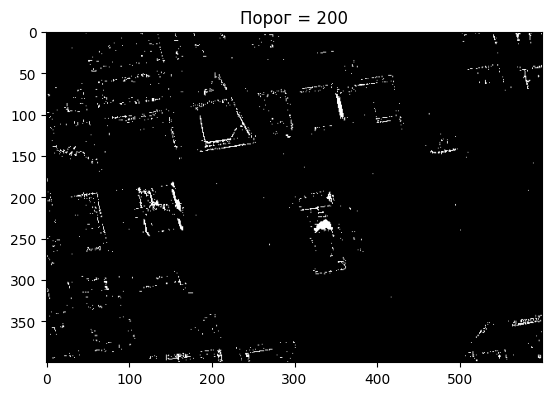

In [148]:
_, thresh1 = cv2.threshold(image_gray, 200, 255, cv2.THRESH_BINARY)
plt.imshow(thresh1, cmap='gray')
plt.title('Порог = 200')
plt.show()